Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Natalie Buchbinder"
COLLABORATORS = "Sarale Goldberger"

---

# PS4 Project

In this project, we are going to continue learning more about scikit-learn and modeling by building another complete model. We also might learn a little NLP along the way.

In [1]:
from sklearn.datasets import fetch_20newsgroups

bunch = fetch_20newsgroups()

In [2]:
print(bunch['DESCR'])

#for i in range(len(bunch.data)):
      #print(i, "example", bunch.target[i])

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

## Part a)

For each of the following words

- the
- subject
- computer
- player
- democrat

please compute the overall percentage of the documents the word appears.  In addition,  for each newsgroup the percentage of documents the word appears in.  Please ignore case in your calculation.  I have provided the words in a list in the cell below.

Please provide your answer in the following format

```
ans = {
   <word>: {
       total_perc: <perc>, 
       subject_percs: {
           <subject>: <perc>
   }
}
```

If a word does not appear in the subject, do not include it in the `subject_percs`.

In [3]:
word_list = ['the', 'subject', 'computer', 'player', 'democrat']

In [4]:
from collections import defaultdict

def def_value_0():
    return 0

def def_value_False():
    return False

def def_value_dict():
    return {}

def def_value_word():
    return { "total_perc" : 0,
             "subject_perc": defaultdict(def_value_0)
           }

def compute_percentages(bunch):

    d = defaultdict(def_value_word)                # answer dictionary
    num_docs = len(bunch.data)                     # how many documents are in the dataset
    num_subjects = defaultdict(def_value_0)      # how many documents there are per subject in the dataset
    found = defaultdict(def_value_False)            # keep track of whether a word has been encountered in my document

    # for each of the documents, make a dictionary counting the amount of times each word from our word list appears
    # For each of the given words, what percentage of the total documents does that word appear in?
    # for each document, for each of the words in the word list
    # if a word in the doc matches a word in the word list
    # increment the counter of that word in the dictionary by 1
     
    # Traverse through the dataset to get documents and subjects
    for doc, subject_id in zip(bunch.data, bunch.target):
        subject = bunch.target_names[subject_id]  # Get the subject name using target ID
        
        # increment the subject counter for the current subject
        num_subjects[subject] += 1
        
        # loop through the words of the document
        for word in doc.split():
            # check if it is one of our words, and if it has not already been encountered for this document
            if word in word_list and not found[word]:
                # note that this word has been encountered
                found[word] = True
                # increment the total_perc counter for this word for this document
                d[word]["total_perc"] += 1
                # increment the subject_perc counter for this word for this document for this subject
                d[word]["subject_perc"][subject] += 1

        # reset the found dictionary to False
        found = defaultdict(def_value_False)

    # Divide the counts by the total docs and multiply by 100 to get the percentage, rounding to 2 decimal places
    for word in d:
        d[word]["total_perc"] = round((d[word]["total_perc"]/num_docs)*100, 2)
        for subject in d[word]["subject_perc"]:
            d[word]["subject_perc"][subject] = round((d[word]["subject_perc"][subject]/num_subjects[subject])*100, 2)

    return d
    

In [5]:
from numpy.testing import assert_almost_equal
def assert_almost_equal(a, b):
    assert abs(a - b) < 1e-5, f"a={a:.5f}, b={b:.5f} are not euql"

In [6]:
ans = compute_percentages(bunch)


## Part b)

Now interpret your results with a plot which shows for each word the relative percentages for each subject.  To make the plots a bit simpler, lets just consider 4 subjects:

- rec.sport.baseball
- talk.politics.misc
- comp.graphics
- talk.rec.motorcycles

these are provided as a list in the next cell.

In [7]:
topics = ['rec.sport.baseball', 'talk.politics.misc', 'comp.graphics', 'rec.motorcycles']

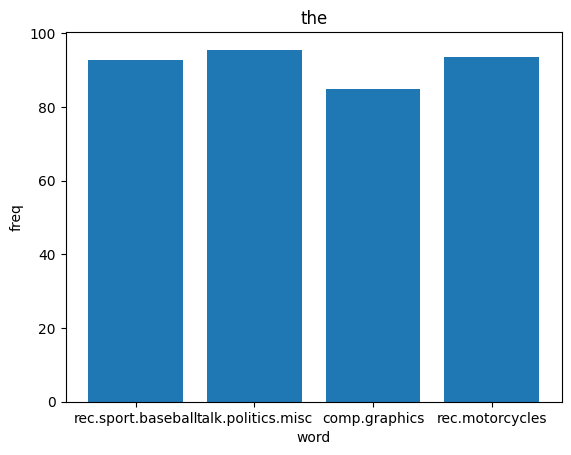

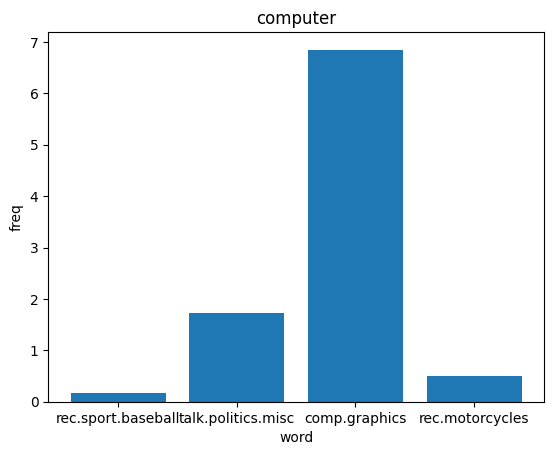

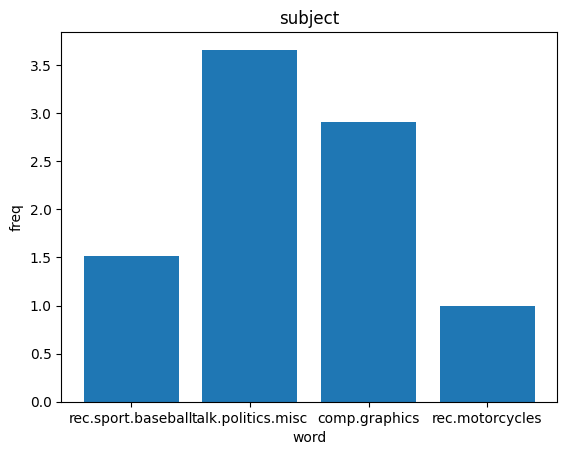

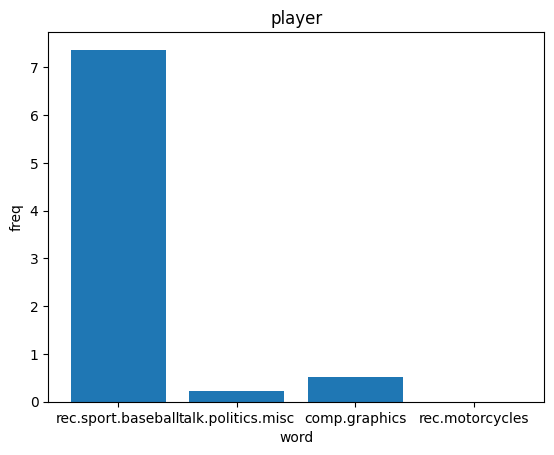

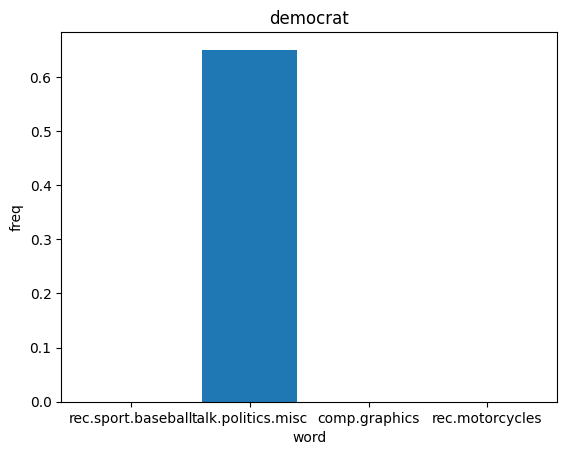

In [8]:
import matplotlib.pyplot as plt
import numpy as np

d = compute_percentages(bunch)

# loop through dict of words



for word in d:
    subj = []
    freq = []
    
    for subject in topics:
        subj += [subject]
        freq += [d[word]["subject_perc"][subject]]
    
    plt.bar(subj, freq)
    plt.title(word)
    plt.xlabel("word")
    plt.ylabel("freq")
    plt.show()



## Part c)

Build a classifier to try to identifier whether the text belongs to one of the `comp` news groups.  This is a  binary classification problem.

The features will be the number of occurences of each word in the document.  You are recommended to use Scikit-learn logistic regression for your implementation.

As hyperparameters, play with the maximum and minimum document frequency for words. (a gridsearch could be a good thing to use to find the optimal hyperparameters!)

NOTE: max_df and min_df play with what percentage of documents it will appear in  and whether it is significant or helpful, e.g. 
```
    'max_df': [100,500,1000,2000], 
    'min_df': [0,1,2,3,5,10,100]
```

Your answer should create a fitted `Estimator` called `classifier_model` which will be used in the testing,

The Scikit estimators you need to import are in the next cell

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

import pandas as pd

The datasets will be prepared in the next cell.

In [10]:

def preProcessingStep(bunch):

    #data clean up (remove extraneous data)

    #remove extraneous data that will cause overfitting
    bunch = fetch_20newsgroups(remove=('headers', 'footers', 'quotes'))

    info = {}
    data = []
    label = []

    # YOUR CODE HERE

    #create a data frame with the data and the label
    info = {'data': data, 'labels': label}
    df = pd.DataFrame(info)
    
    return df

## THOUGHT PROCESS: 

    Use this cell to explain the thought process behind your implementation.


In [ ]:
# implement classifier_model
from sklearn.base import BaseEstimator
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
 
# YOUR CODE HERE
# preprocessing, 
# pipeline with feature transformation 
# train test splits
# model fitting, 
# accuracy metrics and reports
# inference


In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn import base

assert isinstance(classifier_model, base.BaseEstimator)
# lets make sure it runs with no errors